In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("train.csv")

In [44]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [46]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [48]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
#we are applying a loop as we are going to convert the object into numbers.
col_list=[]
for i in df.columns:
    if((df[i].dtype=='object') & (i!="Loan_Status")):
        col_list.append(i)

In [50]:
col_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [51]:
#Let us introduce Label encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in col_list:
    df[i] = label.fit_transform(df[i])

In [52]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


In [54]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


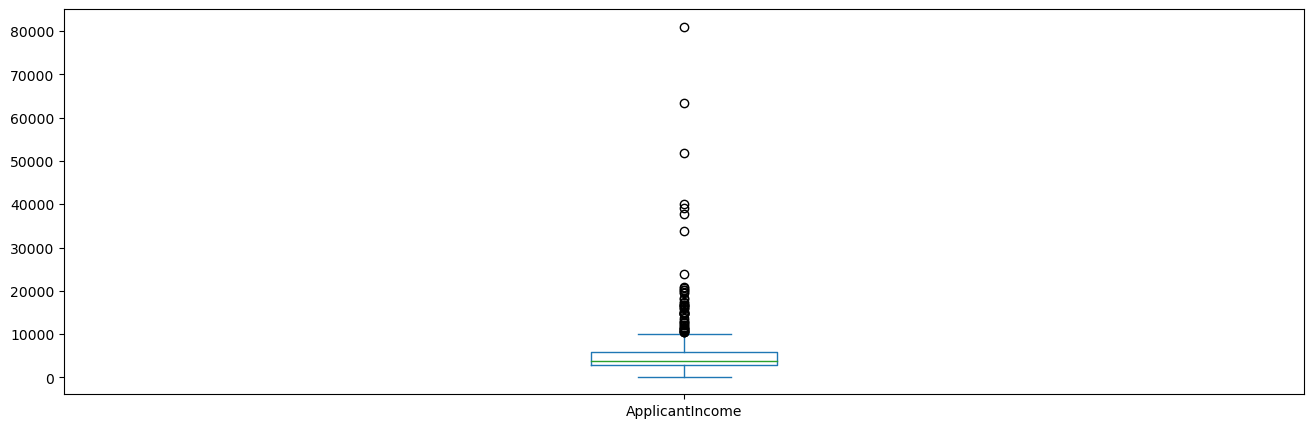

In [55]:
#From describe we can clearly see that the column applicant income may have outliers in it. So we will use imputing method to get rid of outliers.
df['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [56]:
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)

In [57]:
IQR = q3- q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 + 1.5*IQR

In [58]:
#let us define a function to get rid of the outliers
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [59]:
df['ApplicantIncome'] = df['ApplicantIncome'].apply(limit_imputer)

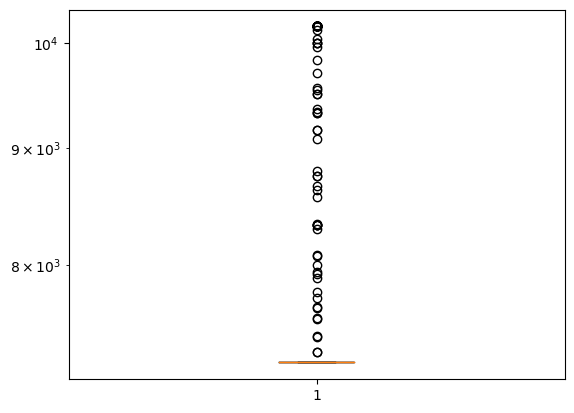

In [60]:
plt.boxplot(df['ApplicantIncome'])
plt.yscale('log')
plt.show()

In [61]:
import seaborn as sns

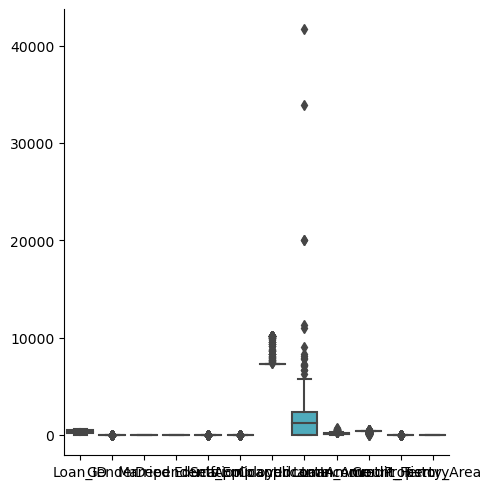

In [62]:
sns.catplot( data = df ,kind='box')
plt.show()

In [63]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,7600.848941,1621.245798,146.412162,342.00000,0.842199,1.037459
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,887.473224,2926.248369,85.587325,65.12041,0.364878,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7253.750000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,7253.750000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,7253.750000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,7253.750000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,10171.250000,41667.000000,700.000000,480.00000,1.000000,2.000000


In [64]:
#lets us treat the missing values now
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [65]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace =True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="Loan_Status")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

              Feature        VIF
0             Loan_ID   4.023129
1              Gender   5.563785
2             Married   3.576102
3          Dependents   1.823222
4           Education   1.314259
5       Self_Employed   1.225229
6     ApplicantIncome  41.073353
7   CoapplicantIncome   1.389027
8          LoanAmount   5.561463
9    Loan_Amount_Term  22.010717
10     Credit_History   6.790231
11      Property_Area   2.814462


In [69]:
#By Feature Engineering
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome'] 

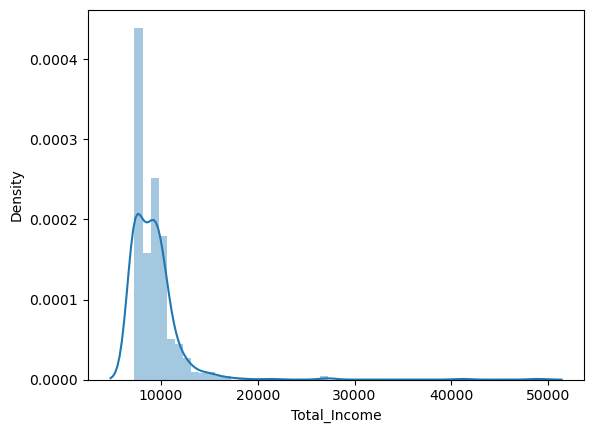

In [70]:
sns.distplot(df['Total_Income']);

In [71]:
def log_transform(sample):
    return np.log(sample)

df['Total_Income'] = df['Total_Income'].map(log_transform)

<Axes: xlabel='Total_Income', ylabel='Density'>

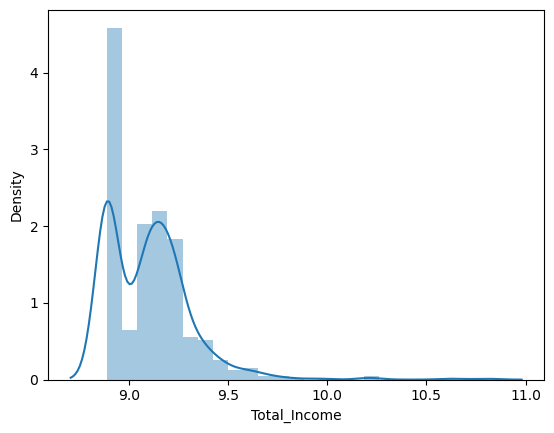

In [72]:
sns.distplot(df['Total_Income'])

In [73]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="Loan_Status")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

              Feature         VIF
0             Loan_ID    4.123708
1              Gender    5.706188
2             Married    3.636562
3          Dependents    1.823234
4           Education    1.367648
5       Self_Employed    1.225429
6     ApplicantIncome  129.841593
7   CoapplicantIncome    1.749615
8          LoanAmount    6.291852
9    Loan_Amount_Term   30.477983
10     Credit_History    7.023003
11      Property_Area    2.859583
12       Total_Income  179.124804


In [74]:
df = df.drop(["ApplicantIncome"],axis=1)

In [76]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="Loan_Status")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

              Feature        VIF
0             Loan_ID   4.123064
1              Gender   5.703204
2             Married   3.619395
3          Dependents   1.822498
4           Education   1.347975
5       Self_Employed   1.221024
6   CoapplicantIncome   1.419900
7          LoanAmount   4.548924
8    Loan_Amount_Term  30.149116
9      Credit_History   7.020873
10      Property_Area   2.851328
11       Total_Income  56.663324


In [77]:
df = df.drop(['Loan_Amount_Term'],axis = 1)

In [78]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="Loan_Status")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

              Feature        VIF
0             Loan_ID   4.117169
1              Gender   5.691168
2             Married   3.598582
3          Dependents   1.820716
4           Education   1.342704
5       Self_Employed   1.218785
6   CoapplicantIncome   1.379609
7          LoanAmount   4.546377
8      Credit_History   7.020432
9       Property_Area   2.833129
10       Total_Income  21.416102


In [79]:
df = df.drop(['Total_Income'], axis= 1)

In [80]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="Loan_Status")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

             Feature       VIF
0            Loan_ID  3.343892
1             Gender  5.018781
2            Married  3.553328
3         Dependents  1.820290
4          Education  1.285250
5      Self_Employed  1.215528
6  CoapplicantIncome  1.368362
7         LoanAmount  3.983771
8     Credit_History  4.833725
9      Property_Area  2.399484


In [81]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,0,1,0,0,0,0,0.0,120.0,1.0,2
1,1,1,1,1,0,0,1508.0,128.0,1.0,0
2,2,1,1,0,0,1,0.0,66.0,1.0,2
3,3,1,1,0,1,0,2358.0,120.0,1.0,2
4,4,1,0,0,0,0,0.0,141.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0.0,71.0,1.0,0
610,610,1,1,3,0,0,0.0,40.0,1.0,0
611,611,1,1,1,0,0,240.0,253.0,1.0,2
612,612,1,1,2,0,0,0.0,187.0,1.0,2


In [82]:
y = df['Loan_Status']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.80,stratify = y)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((491, 10), (123, 10), (491,), (123,))

In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight = 'balanced')
classifier = DecisionTreeClassifier()

In [88]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred = classifier.predict(x_test)

In [91]:
from sklearn.metrics import *
accuracy_score(y_test,y_pred)

0.6666666666666666